# Exploring Data Analysis in Cancer Research Citation Search

    Awesome! You’ve a CSV file containing 1653 records with 12 columns related to research articles (titles, authors, journals, topics, publication years, etc.). Let's break this down into a professional, step-by-step data analysis project using Pandas, NumPy, Matplotlib, and more — including data cleaning, lambda functions, and other advanced concepts for deeper learning and experience.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file
file_path = r"f:\analysis-project\excell\Cancer_Research_Citation_Search_20250411.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    1653 non-null   object
 1   Author(s)                1653 non-null   object
 2   Journal                  1653 non-null   object
 3   Fiscal Year              1653 non-null   object
 4   Publication Year         1653 non-null   object
 5   DOI Link                 979 non-null    object
 6   All Authors              1653 non-null   object
 7   Category Topics          1653 non-null   object
 8   Journal Information      1653 non-null   object
 9   Keyword Search Expanded  1653 non-null   object
 10  URL                      1653 non-null   object
 11  Row                      1653 non-null   object
dtypes: object(12)
memory usage: 155.1+ KB


(None,
                                                Title  \
 0  “When I needed it”: Evaluation of the use and ...   
 1  10-year trends in noncommunicable disease mort...   
 2  2019 ASCCP risk-based management consensus gui...   
 3  2019 ASCCP risk-based management consensus gui...   
 4  2020 cancer incidence data in the USA reveal e...   
 
                                            Author(s)  \
 0  Rohan EA, Townsend JS, Fleischmann A, Stahl S,...   
 1  Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...   
 2  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 3  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 4                                      Townsend JS.,   
 
                                   Journal Fiscal Year Publication Year  \
 0             Journal of Cancer Education       2,019            2,018   
 1   Pan American Journal of Public Health       2,019            2,019   
 2  Journal of Lower Genital Tract Disease       2,020            2,020   
 3  J

    # Clean and preprocess the data

In [30]:
df

,Title,Author(s),Journal,Fiscal Year,Publication Year,DOI Link,All Authors,Category Topics,Journal Information,Keyword Search Expanded,URL,Row
0,“When I needed it”: Evaluation of the use and ...,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Journal of Cancer Education,"2,019","2,018",https://dx.doi.org/10.1007/s13187-017-1178-7,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Breast Cancer,Journal: Journal of Cancer Education (Volume: ...,“When I needed it”: Evaluation of the use and ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,1
1,10-year trends in noncommunicable disease mort...,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Pan American Journal of Public Health,"2,019","2,019",https://dx.doi.org/10.26633/RPSP.2019.37,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Health Disparities in Cancer,Journal: Pan American Journal of Public Health...,10-year trends in noncommunicable disease mort...,http://iris.paho.org/xmlui/handle/123456789/50554,2
2,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,"2,020","2,020",https://dx.doi.org/10.1097/LGT.0000000000000525,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,2019 ASCCP risk-based management consensus gui...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,3
3,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,"2,024","2,024",https://dx.doi.org/10.1097/LGT.0000000000000788,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,2019 ASCCP risk-based management consensus gui...,https://pubmed.ncbi.nlm.nih.gov/38117563/,4
4,2020 cancer incidence data in the USA reveal e...,"Townsend JS.,",Lancet Oncology,"2,023","2,023",https://dx.doi.org/10.1016/S1470-2045(23)00337-6,"Townsend JS.,",Breast Cancer,Journal: Lancet Oncology (Volume: 24; Issue: 8...,2020 cancer incidence data in the USA reveal e...,https://pubmed.ncbi.nlm.nih.gov/37541267/,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Years of potential life lost and productivity ...,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",Cancer,"2,009","2,008",NaN,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",HPV-Associated Cancers,Journal: Cancer (Volume: 113; Issue: S10; Page...,Years of potential life lost and productivity ...,http://www.ncbi.nlm.nih.gov/pubmed/18980277,"3,729"
1649,Years of potential life lost and productivity ...,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Urology,"2,010","2,010",NaN,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Prostate Cancer,Journal: Urology (Volume: 76; Issue: 3; Pages:...,Years of potential life lost and productivity ...,http://www.ncbi.nlm.nih.gov/pubmed/20573389,"3,730"
1650,Years of potential life lost caused by prostat...,"Li C, Ekwueme DU.",Cancer Epidemiology,"2,010","2,010",NaN,"Li C, Ekwueme DU.",Prostate Cancer,Journal: Cancer Epidemiology (Volume: 64; Issu...,Years of potential life lost caused by prostat...,http://www.ncbi.nlm.nih.gov/pubmed/20510666,"3,731"
1651,Young breast cancer survivors: Employment expe...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",RTI Press,"2,020","2,020",https://dx.doi.org/10.3768/rtipress.2020.rr.00...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",Breast Cancer,Journal: RTI Press (Volume: ; Issue: ; Pages: ...,Young breast cancer survivors: Employment expe...,https://www.rti.org/rti-press-publication/youn...,"3,732"


In [31]:
# Strip and convert 'Fiscal Year' and 'Publication Year' to numeric
df['Fiscal Year'] = df['Fiscal Year'].str.replace(",", "").astype(int)
df['Publication Year'] = df['Publication Year'].str.replace(",", "").astype(int)

# Fill missing 'DOI Link' with 'Unavailable'
df['DOI Link'] = df['DOI Link'].fillna('Unavailable')

# Drop 'Row' column as it's just an index
df.drop(columns=['Row'], inplace=True)

# Check for any remaining missing values
missing_summary = df.isnull().sum()

# Show cleaned data summary
summary = {
    "Shape": df.shape,
    "Data Types": df.dtypes,
    "Missing Values": missing_summary[missing_summary > 0],
    "Sample Rows": df.sample(5, random_state=42)
}

summary


{'Shape': (1653, 11),
 'Data Types': Title                      object
 Author(s)                  object
 Journal                    object
 Fiscal Year                 int32
 Publication Year            int32
 DOI Link                   object
 All Authors                object
 Category Topics            object
 Journal Information        object
 Keyword Search Expanded    object
 URL                        object
 dtype: object,
 'Missing Values': Series([], dtype: int64),
 'Sample Rows':                                                  Title  \
 298  Cervical cancer incidence in the United States...   
 65   Advanced notification calls prior to mailed fe...   
 551  Editorial: Cancer in American Indian and Alask...   
 483  Descriptive epidemiology of colorectal cancer ...   
 23   A national survey of primary care physicians’ ...   
 
                                              Author(s)  \
 298  Benard VB, Coughlin SS, Thompson T, Richardson...   
 65   Lee B, Patel S, Rachock

          Combine all authors into one list
          Count the most common authors
          Convert to DataFrame for display

In [32]:
from collections import Counter

# Combine all authors into one list
all_authors_series = df['Author(s)'].dropna().apply(lambda x: [a.strip() for a in x.split(",")])
all_authors_flat = [author for sublist in all_authors_series for author in sublist]

# Count the most common authors
author_counts = Counter(all_authors_flat).most_common(15)

# Convert to DataFrame for display
top_authors_df = pd.DataFrame(author_counts, columns=["Author", "Publication Count"])
top_authors_df


,Author,Publication Count
0,Saraiya M,159
1,Ekwueme DU,124
2,Richardson LC,101
3,Richardson LC.,89
4,Saraiya M.,80
5,Weir HK,69
6,Henley SJ,69
7,Sabatino SA,68
8,Hall IJ,63
9,Rim SH,60


# Set plot style

      Year-wise Publication Trend

C:\Users\yahya\AppData\Local\Temp\ipykernel_9648\970724335.py:14: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\yahya\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


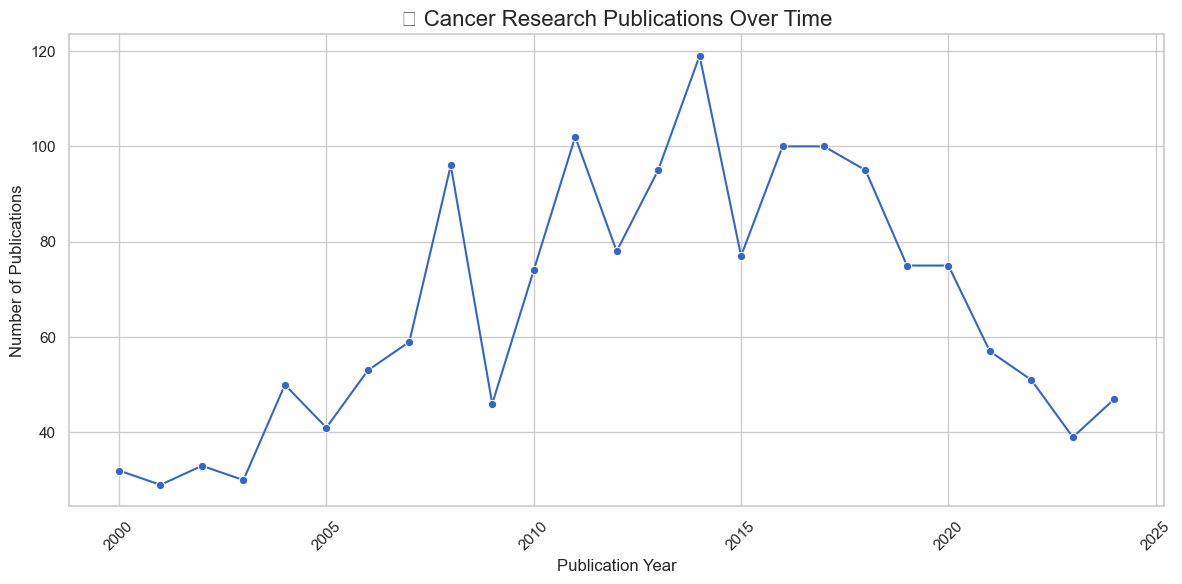

In [33]:
# Set plot style
sns.set(style="whitegrid")

# 1. Year-wise Publication Trend
yearly_publications = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_publications.index, y=yearly_publications.values, marker="o", color="#3366cc")
plt.title("📅 Cancer Research Publications Over Time", fontsize=16)
plt.xlabel("Publication Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


     Count publications per year

C:\Users\yahya\AppData\Local\Temp\ipykernel_9648\614248344.py:14: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\yahya\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


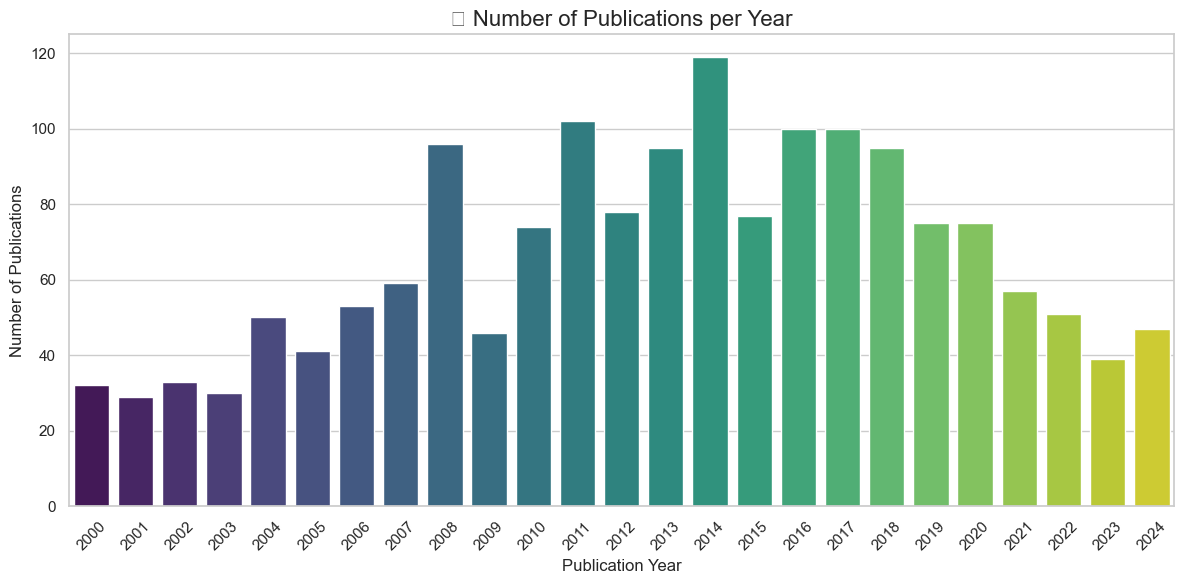

In [34]:
# Set the style
sns.set(style="whitegrid")

# Count publications per year
yearly_counts = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("📅 Number of Publications per Year", fontsize=16)
plt.xlabel("Publication Year")
plt.ylabel("Number of Publications")
plt.tight_layout()
plt.show()


          Count top 10 journals by frequency

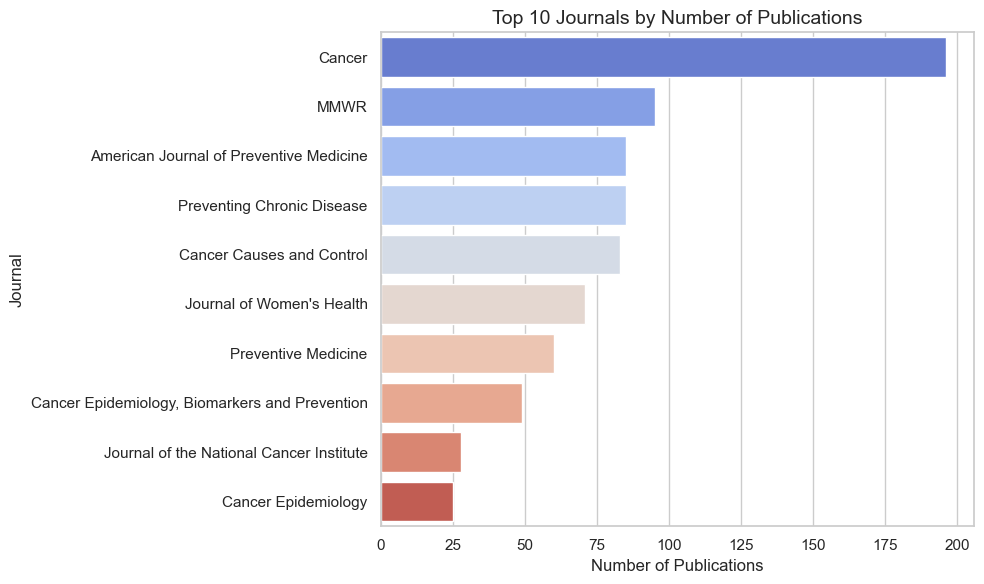

In [35]:
# Count top 10 journals by frequency
top_journals = df['Journal'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="coolwarm")
plt.title("Top 10 Journals by Number of Publications", fontsize=14)
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()


#   Filter for Breast Cancer-related 
    Convert Fiscal Year and Publication Year to integers (safely)
    Create a pivot table (journal vs. publication year)
    Step 4: Keep top 15 journals by total publications
    Plot the heatmap

C:\Users\yahya\AppData\Local\Temp\ipykernel_9648\3525007183.py:26: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  plt.tight_layout()
C:\Users\yahya\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


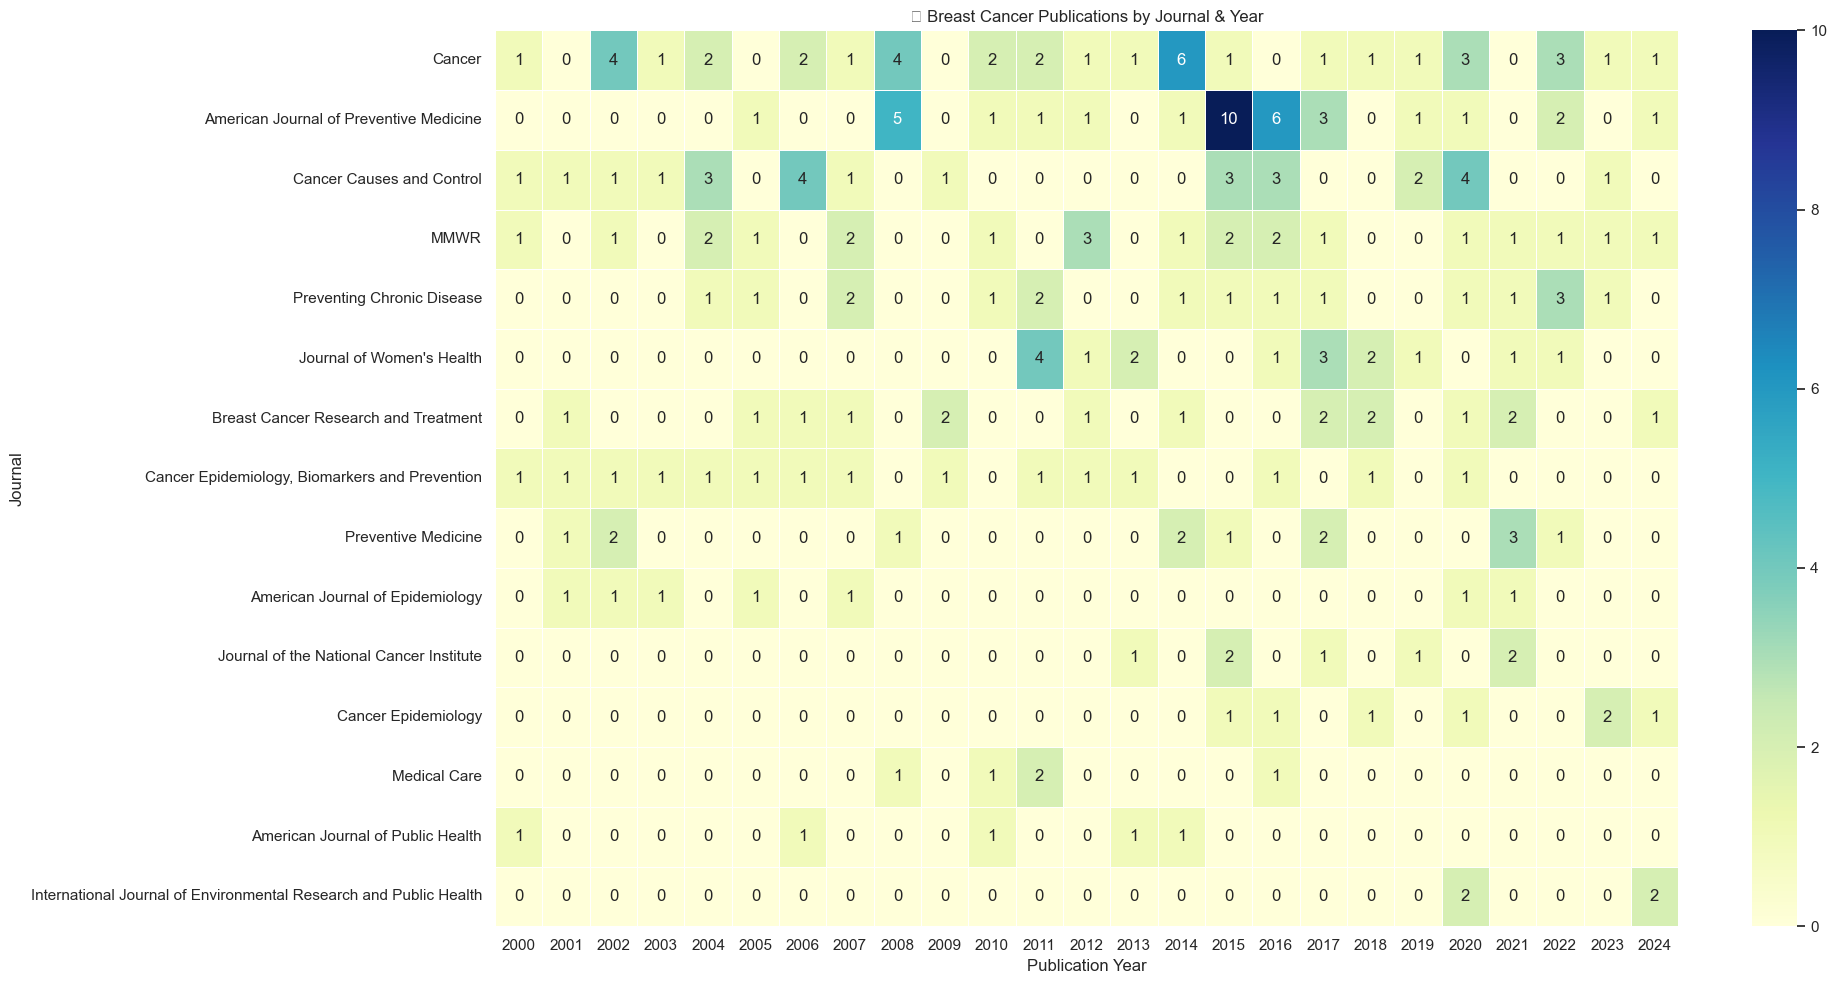

In [ ]:

bc_df = df[df['Category Topics'].str.contains("Breast Cancer", case=False, na=False)].copy()

# Step 2: Convert Fiscal Year and Publication Year to integers (safely)
bc_df['Fiscal Year'] = bc_df['Fiscal Year'].astype(str).str.replace(",", "").astype(int)
bc_df['Publication Year'] = bc_df['Publication Year'].astype(str).str.replace(",", "").astype(int)


# Step 3: Create a pivot table (journal vs. publication year)
pivot_table = (
    bc_df.groupby(['Journal', 'Publication Year'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Keep top 15 journals by total publications
top_journals = pivot_table.sum(axis=1).sort_values(ascending=False).head(15).index
pivot_table_top = pivot_table.loc[top_journals]

# Step 5: Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table_top, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='d')
plt.title("🧬 Breast Cancer Publications by Journal & Year")
plt.xlabel("Publication Year")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()


In [43]:
df


,Title,Author(s),Journal,Fiscal Year,Publication Year,DOI Link,All Authors,Category Topics,Journal Information,Keyword Search Expanded,URL
0,“When I needed it”: Evaluation of the use and ...,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Journal of Cancer Education,2019,2018,https://dx.doi.org/10.1007/s13187-017-1178-7,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Breast Cancer,Journal: Journal of Cancer Education (Volume: ...,“When I needed it”: Evaluation of the use and ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
1,10-year trends in noncommunicable disease mort...,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Pan American Journal of Public Health,2019,2019,https://dx.doi.org/10.26633/RPSP.2019.37,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Health Disparities in Cancer,Journal: Pan American Journal of Public Health...,10-year trends in noncommunicable disease mort...,http://iris.paho.org/xmlui/handle/123456789/50554
2,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,2020,2020,https://dx.doi.org/10.1097/LGT.0000000000000525,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,2019 ASCCP risk-based management consensus gui...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
3,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,2024,2024,https://dx.doi.org/10.1097/LGT.0000000000000788,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,2019 ASCCP risk-based management consensus gui...,https://pubmed.ncbi.nlm.nih.gov/38117563/
4,2020 cancer incidence data in the USA reveal e...,"Townsend JS.,",Lancet Oncology,2023,2023,https://dx.doi.org/10.1016/S1470-2045(23)00337-6,"Townsend JS.,",Breast Cancer,Journal: Lancet Oncology (Volume: 24; Issue: 8...,2020 cancer incidence data in the USA reveal e...,https://pubmed.ncbi.nlm.nih.gov/37541267/
...,...,...,...,...,...,...,...,...,...,...,...
1648,Years of potential life lost and productivity ...,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",Cancer,2009,2008,Unavailable,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",HPV-Associated Cancers,Journal: Cancer (Volume: 113; Issue: S10; Page...,Years of potential life lost and productivity ...,http://www.ncbi.nlm.nih.gov/pubmed/18980277
1649,Years of potential life lost and productivity ...,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Urology,2010,2010,Unavailable,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Prostate Cancer,Journal: Urology (Volume: 76; Issue: 3; Pages:...,Years of potential life lost and productivity ...,http://www.ncbi.nlm.nih.gov/pubmed/20573389
1650,Years of potential life lost caused by prostat...,"Li C, Ekwueme DU.",Cancer Epidemiology,2010,2010,Unavailable,"Li C, Ekwueme DU.",Prostate Cancer,Journal: Cancer Epidemiology (Volume: 64; Issu...,Years of potential life lost caused by prostat...,http://www.ncbi.nlm.nih.gov/pubmed/20510666
1651,Young breast cancer survivors: Employment expe...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",RTI Press,2020,2020,https://dx.doi.org/10.3768/rtipress.2020.rr.00...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",Breast Cancer,Journal: RTI Press (Volume: ; Issue: ; Pages: ...,Young breast cancer survivors: Employment expe...,https://www.rti.org/rti-press-publication/youn...
